## Guided Project: Finding the Best Markets to Advertise In

In [2]:
import pandas as pd

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

for col in data.columns:
    print(col)

print(data.head(3))

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


In [4]:
distrib = data['JobRoleInterest'].value_counts(normalize=True)
distrib

Full-Stack Web Developer                                                                                                                         0.120158
  Front-End Web Developer                                                                                                                        0.044269
  Data Scientist                                                                                                                                 0.023715
  Mobile Developer                                                                                                                               0.016601
Back-End Web Developer                                                                                                                           0.015810
Full-Stack Web Developer,   Front-End Web Developer                                                                                              0.012648
  Front-End Web Developer, Full-Stack Web Developer                         

## Development interest

In [13]:
languages = data['JobRoleInterest'].dropna()
list_langage = languages.str.split(',')

list_langage_number = list_langage.apply(lambda x:len(x))
list_langage_number

list_langage_number.value_counts(normalize=True).sort_values(ascending=False)

1     0.272727
3     0.180237
4     0.165217
2     0.125692
5     0.123320
6     0.067194
7     0.033202
8     0.011858
9     0.011067
10    0.004743
11    0.002372
12    0.002372
Name: JobRoleInterest, dtype: float64

In [19]:
number_langages = list_langage_number.value_counts(normalize=True).sort_index(ascending=True)
number_langages

1     0.272727
2     0.125692
3     0.180237
4     0.165217
5     0.123320
6     0.067194
7     0.033202
8     0.011858
9     0.011067
10    0.004743
11    0.002372
12    0.002372
Name: JobRoleInterest, dtype: float64

In [32]:
diagramme={}
cumul=0
for value in number_langages.items():
    if value[0]<=9:
        chiffre=str(0) + str(value[0]) + ' ' + 'langage(s)'
    else:
        chiffre=str(value[0]) + ' ' + 'langage(s)'
   
    cumul+=value[1]
    diagramme[chiffre]=cumul

diagramme

{'01 langage(s)': 0.2727272727272727,
 '02 langage(s)': 0.3984189723320158,
 '03 langage(s)': 0.5786561264822134,
 '04 langage(s)': 0.7438735177865612,
 '05 langage(s)': 0.8671936758893279,
 '06 langage(s)': 0.9343873517786561,
 '07 langage(s)': 0.9675889328063241,
 '08 langage(s)': 0.9794466403162055,
 '09 langage(s)': 0.9905138339920949,
 '10 langage(s)': 0.9952569169960475,
 '11 langage(s)': 0.9976284584980237,
 '12 langage(s)': 1.0}

## Interest Visualisation

In [35]:
df = pd.Series(diagramme)
df

01 langage(s)    0.272727
02 langage(s)    0.398419
03 langage(s)    0.578656
04 langage(s)    0.743874
05 langage(s)    0.867194
06 langage(s)    0.934387
07 langage(s)    0.967589
08 langage(s)    0.979447
09 langage(s)    0.990514
10 langage(s)    0.995257
11 langage(s)    0.997628
12 langage(s)    1.000000
dtype: float64

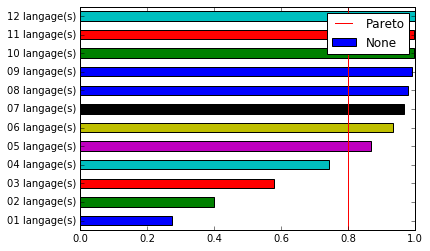

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot.barh()
plt.axvline(x=0.80,color='red',label='Pareto')
plt.legend()
plt.show()

## Localisation markets

In [43]:
data =data.dropna(subset=['JobRoleInterest'])
country = data['CountryLive'].value_counts(normalize=True).sort_values(ascending=False)
country

United States of America         0.500000
India                            0.084677
United Kingdom                   0.051613
Canada                           0.039516
Germany                          0.020968
Poland                           0.019355
Brazil                           0.018548
Australia                        0.015323
Romania                          0.011290
Russia                           0.010484
Italy                            0.009677
France                           0.008871
Spain                            0.008871
Netherlands (Holland, Europe)    0.008065
Serbia                           0.007258
Mexico                           0.007258
Belgium                          0.007258
New Zealand                      0.006452
Turkey                           0.006452
Sweden                           0.006452
Bosnia & Herzegovina             0.005645
Argentina                        0.005645
Singapore                        0.005645
Philippines                      0

In [44]:
country[:2]

United States of America    0.500000
India                       0.084677
Name: CountryLive, dtype: float64

## Mobile Interests

True     87.98419
False    12.01581
Name: JobRoleInterest, dtype: float64


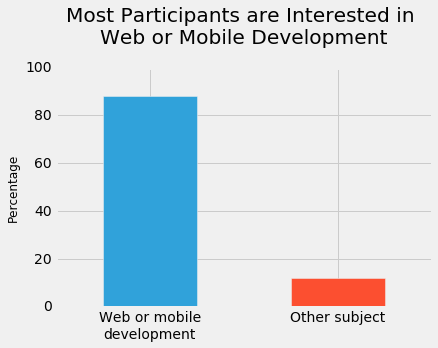

In [45]:
interests_no_nulls = data['JobRoleInterest'].dropna()
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

## Money for learning

In [63]:
data['Money_per_month']=data['MoneyForLearning']/(data['MonthsProgramming'].replace(0,1))

In [64]:
data['Money_per_month'].isna().value_counts()

False    1143
True      122
Name: Money_per_month, dtype: int64

In [65]:
new_data = data.dropna(subset=['CountryLive','Money_per_month'])

condition1=  new_data['CountryLive']== 'United States of America'
condition2=  new_data['CountryLive']== 'United Kingdom'
condition3=  new_data['CountryLive']== 'India'
condition4=  new_data['CountryLive']== 'Canada'

condition = condition1 | condition2 | condition3 | condition4


In [66]:
new_data = new_data[condition]

In [68]:
new_data.groupby(['CountryLive'])['Money_per_month'].mean().sort_values(ascending=False)

CountryLive
United States of America    262.466988
India                       119.467205
Canada                       35.808258
United Kingdom               18.921319
Name: Money_per_month, dtype: float64

In [69]:
new_data.groupby(['CountryLive'])['Money_per_month'].median().sort_values(ascending=False)

CountryLive
United States of America    6.666667
United Kingdom              0.000000
India                       0.000000
Canada                      0.000000
Name: Money_per_month, dtype: float64

In [72]:
new_data.groupby(['CountryLive'])['Money_per_month'].max().sort_values(ascending=False)

CountryLive
United States of America    50000.000000
India                        5000.000000
Canada                        583.333333
United Kingdom                285.714286
Name: Money_per_month, dtype: float64

## Dealing with extreme Outliers

In [87]:
box_plot = pd.Series(new_data['Money_per_month'].values
                     ,index=new_data['CountryLive'])

box_plot.head()


CountryLive
United States of America     13.333333
United States of America    200.000000
United Kingdom                0.000000
United States of America      0.000000
United States of America     16.666667
dtype: float64

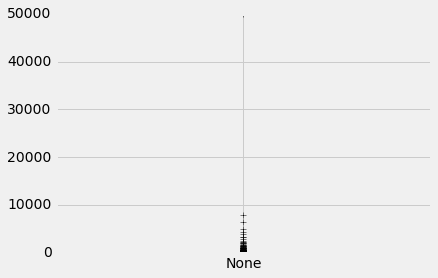

In [93]:
#box_plot.isna().sum()
#box_plot.plot(kind='box',use_index=True)
#new_data[['CountryLive','Money_per_month']].plot(kind='box')
box_plot.plot.box()
plt.show()

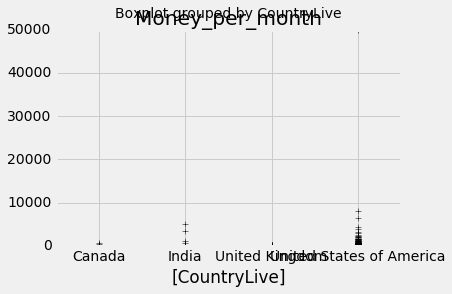

In [94]:
new_data[['CountryLive','Money_per_month']].boxplot(by='CountryLive')

In [95]:
new_data.groupby(['CountryLive'])['Money_per_month'].max().sort_values(ascending=False)

CountryLive
United States of America    50000.000000
India                        5000.000000
Canada                        583.333333
United Kingdom                285.714286
Name: Money_per_month, dtype: float64

In [96]:
condition = new_data['Money_per_month']< 5000
new_data_cap = new_data[condition]



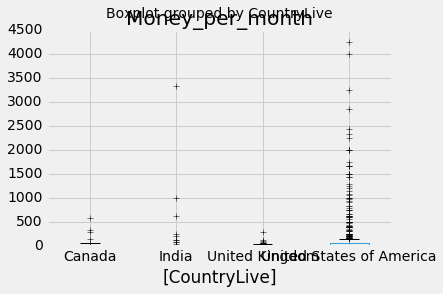

In [97]:
new_data_cap[['CountryLive','Money_per_month']].boxplot(by='CountryLive')

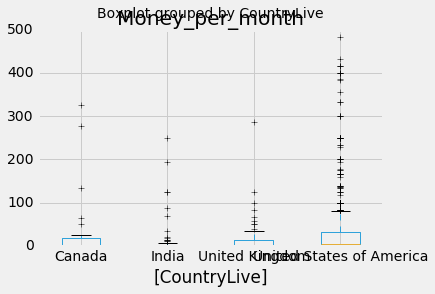

In [99]:
condition = new_data['Money_per_month']< 500
new_data_cap = new_data[condition]
new_data_cap[['CountryLive','Money_per_month']].boxplot(by='CountryLive')


In [102]:
new_data_cap.groupby(['CountryLive'])['Money_per_month'].max().sort_values(ascending=False)

CountryLive
United States of America    482.758621
Canada                      325.000000
United Kingdom              285.714286
India                       250.000000
Name: Money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


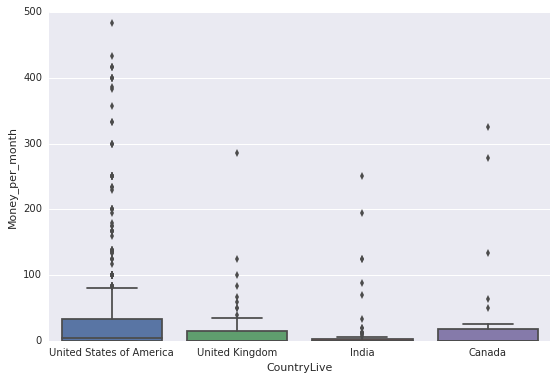

In [103]:
import seaborn as sns

sns.boxplot(x='CountryLive',
            y='Money_per_month',
           data=new_data_cap)


## Z-Score for choosing second market

In [109]:
def z_score(value,mean,std):
    return (value-mean)/std

mean = new_data_cap['Money_per_month'].mean()
std = new_data_cap['Money_per_month'].std(ddof=1)

new_data_cap['z_score']=new_data_cap['Money_per_month'].apply(lambda x:(x-mean)/std)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
new_data_cap.groupby(['CountryLive'])['z_score'].mean().sort_values(ascending=False)


CountryLive
United States of America    0.077173
Canada                     -0.122463
United Kingdom             -0.182548
India                      -0.279734
Name: z_score, dtype: float64

In [119]:
for country in new_data_cap['CountryLive'].unique():
    data_country=new_data_cap[new_data_cap['CountryLive']==country]
    mean = data_country['Money_per_month'].mean()
    std = data_country['Money_per_month'].std(ddof=1)
    z_score= (59-mean)/std
    print('Z-score {} : {}'.format(country,z_score))
    
    

Z-score United States of America : 0.2591618373811662
Z-score United Kingdom : 0.8967313005116765
Z-score India : 1.1997306396928151
Z-score Canada : 0.5412114307936637
Z-score nan : nan
